In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate some random samples
x = np.linspace(0, 4, 120)

# Apply our random samples through a linear equation
y = 2*x + 0.9 + np.random.randn(x.shape[0])

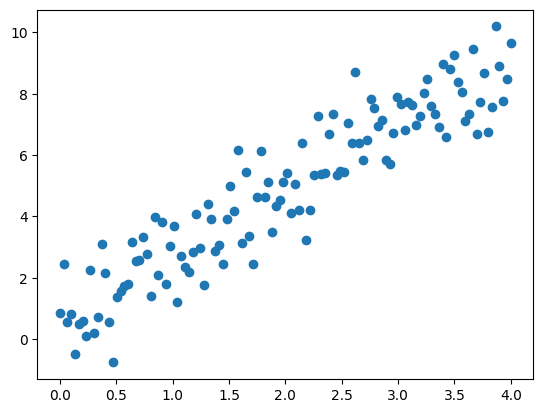

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
# Build our Linear Regression Model
class LinearRegressionModel:
    def __init__(self):
      # Initializing our Weight and Bias Variables
      self.Weight = tf.Variable(5.0)
      self.Bias = tf.Variable(6.0)

    def __call__(self, x):
      return self.Weight * x + self.Bias

In [6]:
# Creating our Loss Function (Least Squard Error)
def Loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [7]:
from tensorflow.python.ops.gen_nn_ops import lrn_eager_fallback
# Now it's time to build our Train function
def train(LinearModel, x, y, lr=0.12):
    with tf.GradientTape() as t:
        current_loss = Loss(y, LinearModel(x))

    # Take Derivative with Gradient Tape
    lr_weight, lr_bias = t.gradient(current_loss, [LinearModel.Weight, LinearModel.Bias])

    # Applying the gradient on Weight and Bias
    # previus_weight - (learning_rate * derivative)
    # previus_bias - (learning_rate * derivative)
    LinearModel.Weight.assign_sub(lr * lr_weight)
    LinearModel.Bias.assign_sub(lr * lr_bias)

In [8]:
LinearModel = LinearRegressionModel()
epochs = 100

In [9]:
# Start Training Progress
for epoch in range(epochs):
    real_loss = Loss(y, LinearModel(x))
    train(LinearModel, x, y)

    print(f"{epoch} - Loss: {real_loss.numpy()}")

0 - Loss: 136.08978271484375
1 - Loss: 33.39589309692383
2 - Loss: 10.24647331237793
3 - Loss: 4.86837911605835
4 - Loss: 3.4771816730499268
5 - Loss: 2.99523663520813
6 - Loss: 2.7338664531707764
7 - Loss: 2.5375940799713135
8 - Loss: 2.370091438293457
9 - Loss: 2.22178316116333
10 - Loss: 2.089212656021118
11 - Loss: 1.9704264402389526
12 - Loss: 1.8639274835586548
13 - Loss: 1.7684307098388672
14 - Loss: 1.6827964782714844
15 - Loss: 1.6060051918029785
16 - Loss: 1.5371439456939697
17 - Loss: 1.4753934144973755
18 - Loss: 1.4200197458267212
19 - Loss: 1.3703643083572388
20 - Loss: 1.325836181640625
21 - Loss: 1.285906434059143
22 - Loss: 1.2500996589660645
23 - Loss: 1.2179908752441406
24 - Loss: 1.1891975402832031
25 - Loss: 1.1633776426315308
26 - Loss: 1.140223741531372
27 - Loss: 1.1194608211517334
28 - Loss: 1.1008422374725342
29 - Loss: 1.0841461420059204
30 - Loss: 1.0691741704940796
31 - Loss: 1.0557483434677124
32 - Loss: 1.0437088012695312
33 - Loss: 1.0329123735427856
34 

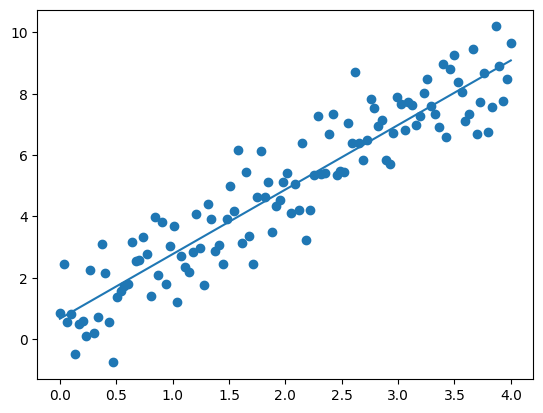

In [10]:
plt.scatter(x, y)
plt.plot(x, LinearModel(x))
plt.show()